# Big Mart Sales Data Analysis.

## Introduction:
This is a collaborative project as part of the FWD scholarship and Udacity online platform in the Advanced Data analysis track. The dataset is about products and some related attributes, and the most important one being the item sales, which will be the main point of analysis. The questions answered are:
<ul>
    <li>Does the locality of the outlet affect sales?
    <li>Do different items have different sales?
    <li>Does MRP affect sales?

In [1]:
#importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset and reading few lines.
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### This will be a documnation for the attributes in the datasets.
<ul>
<li>item identifier: a series of numerical or alphanumerical digits that are used to identify a specific product.
<li>item weight: is the actual weight of the item.
<li>item fat content: total fat in the item.
<li>item visibility: is the ability for shoppers to discover, identify, and engage with products.
<li>item type: define the contents of an item and the information that is stored about an item.
<li>item MRP: is a system for calculating the materials and components needed to manufacture a product.
<li>outlet identifier: a unique identifier assigned to each service type outlet.
<li>outlet establishment year: establishment year of the outlet.
<li>outlet size: the size of the outlet.
<li>outlet location type: locations of outlets ranked with tier3 being the highest.
<li>outlet type: type of the outlet.
<li>item outlet sales: the amount of sales for an item in specific outlet.

In [3]:
#exploring basic information about the dataset.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### First, we deal with NAN and duplicated values in the dataset.

In [5]:
#converting columns' names to lowercase for easier access.
df.columns = df.columns.str.lower()

In [6]:
#filling missing values in item weight column
#with mean value.
df.item_weight.fillna(df.item_weight.mean(),inplace=True);

In [7]:
#converting outlet size column into 
#numerical values for easier analysis.
df.outlet_size.replace({'High':3,'Medium':2,'Small':1},inplace=True)

In [8]:
#filling missing values in outlet size column
#with mean value.
df.outlet_size.fillna(df.outlet_size.mean(),inplace=True);

In [9]:
#replacing synonyms in item fat content column.
df.item_fat_content.replace({'Low Fat':'low','LF':'low','low fat':'low','Regular':'regular','reg':'regular'},inplace=True)

In [10]:
#checking for duplicated values.
df.duplicated().sum()

0

In [11]:
#saving the modified dataframe
#into a csv file.
df.to_csv('train_cleaned.csv')

#### Now with no duplicates or NAN values or any sort of messy data, we can start our analysis.

In [12]:
#importing the cleand data into a dataframe.
df = pd.read_csv('train_cleaned.csv')

#### Q1: Does the locality of the outlet affect sales?

To answer this we need to investigate two main aspects of the outlet, which are outlet size and outlet type.

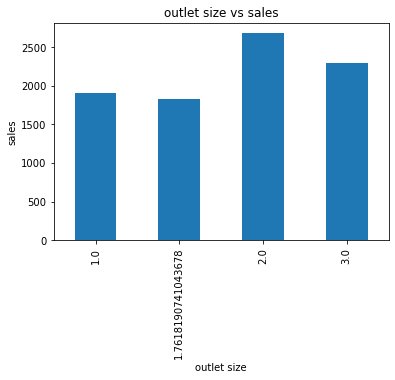

In [13]:
#the average sales based on outlet size.
df.groupby(['outlet_size'])['item_outlet_sales'].mean().plot(kind='bar');
plt.xlabel('outlet size');
plt.ylabel('sales');
plt.title('outlet size vs sales');

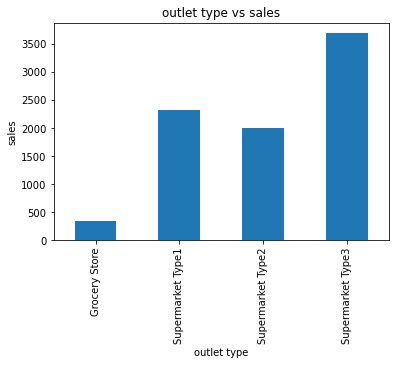

In [14]:
#the average sales based on outlet type.
df.groupby(['outlet_type'])['item_outlet_sales'].mean().plot(kind='bar');
plt.xlabel('outlet type');
plt.ylabel('sales');
plt.title('outlet type vs sales');

Based on the above graphs and generally speaking, the bigger the outlet and more products available in it, the more chance it has of having more customers and sales, which makes sense, as it's more convenient to do all your purchases in one place.

#### Q2: Do different items have different sales?

To answer this, we need to explore the attributes associated with the items.

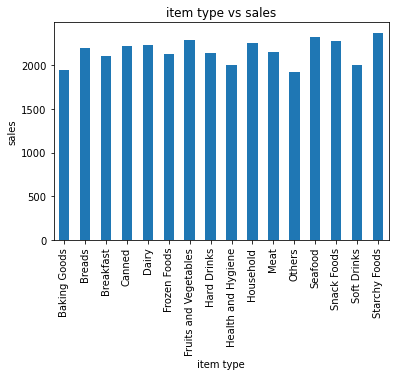

In [15]:
#Sales based on item type.
df.groupby(['item_type'])['item_outlet_sales'].mean().plot(kind='bar');
plt.xlabel('item type');
plt.ylabel('sales');
plt.title('item type vs sales');

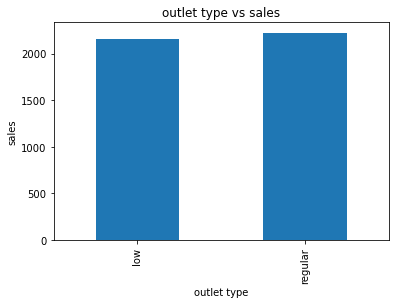

In [16]:
#Sales based on fat content.
df.groupby(['item_fat_content'])['item_outlet_sales'].mean().plot(kind='bar');
plt.xlabel('outlet type');
plt.ylabel('sales');
plt.title('outlet type vs sales');

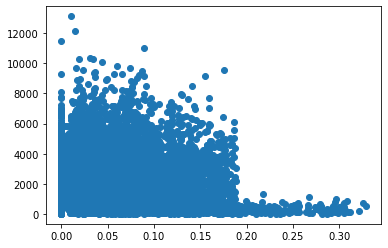

In [17]:
#sales distribution based on the visibility.
plt.scatter(df.item_visibility,df.item_outlet_sales);

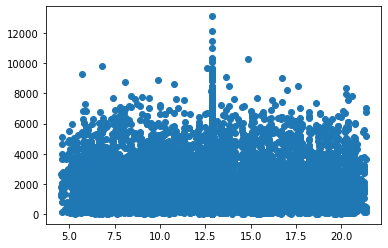

In [18]:
#Sales distribution based on item weight.
plt.scatter(df.item_weight,df.item_outlet_sales);

The graphs show that there's no one item type that has significantly higher sales than others, also fat content doesn't seem to affect sales too, weight doesn't play a much bigger role too, but the one thing to notice is that visibility has a negative correlation, with most sales coming from items with relatively lower visibility rates.

#### Q3: Does MRP affect sales?

We need to investigate the item MRP column to be able to answer this question.

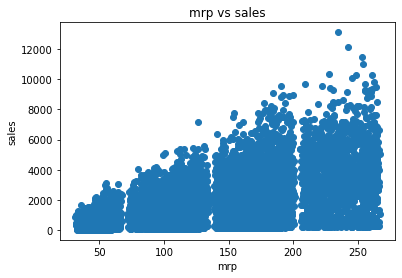

In [19]:
#Plotting MRP vs sales.
plt.scatter(df.item_mrp,df.item_outlet_sales);
plt.xlabel('mrp');
plt.ylabel('sales');
plt.title('mrp vs sales');

It's not surprising to have a strong positive correlation between MRP and sales, as high costing goods will -on average- have higher prices and profits than low costing goods.